# MiniProject#1
안녕하세요, 딥러닝 조교 전형준입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1 ) 참고

이번 과제는 Convolutional Neural Network를 이용하여 Classification을 해보는 것입니다.


##  심슨캐릭터 분류기
만들어볼 모델은 심슨 캐릭터를 분류하는 모델입니다.
심슨에는 많은 캐릭터가 나오지만 그중에서 20가지 캐릭터를 분류해보겠습니다.

keras에서 이미지의 train set을 생성하는 방법은 ImageDataGenerator모듈의 flow_from_directory를 사용하여 불러오는 방법이 있습니다. 저희의 실습환경은 구글 Colab이기 때문에, 위의 방법은 효율적이지 못합니다.


※flow_from_directory은 사진을 한장씩 읽어서, 데이터셋을 만드는데 구글 colab은 이러한 방식이 매우 오래걸립니다. 또한 Google 드라이브에 올리는 것 역시 오래 걸립니다.

그래서 numpy형태로 저장해둔  train set을 사용하여 실습 및 미니프로젝트를 진행하겠습니다. 

##1.먼저 구글드라이브와 colab을 연동해봅시다.
- step 1: 구글드라이브의 '**내 드라이브**' 아래에 '**Simpson**' 이라는 이름의 폴더를 만들어보세요.
- step 2: 이 프로젝트를 해당 경로에 놓고, 올려드린 **train.npy, train_label.npy**를 업로드 해서 넣어주세요.(약 2분정도 소요됩니다.)
- step 3: 다 되었다면 아래처럼 폴더에 파일이 있을겁니다.

내 드라이브

L Simpson
> L MiniProject#1.ipynb

> L train.npy

> L train_label.npy


- step 4: 이제 구글드라이브와 colab을 연동하겠습니다. 아래의 코드를 실행해주세요. 링크하나와 authorization code가 나올겁니다.
[참고링크](https://somjang.tistory.com/entry/Google-Colab%EC%97%90%EC%84%9C-Google-Drive%EC%99%80-%EC%97%B0%EB%8F%99%ED%95%98%EA%B8%B0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
if os.getcwd() != '/content/drive/My Drive':
    os.chdir('./drive/My Drive')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


    Mounted at /content/drive/ 
라는 문구가 나왔다면 성공입니다.아래의 명령어를 실행하여

    /content/drive/My Drive
이 나왔는지 확인해주세요

In [ ]:
!pwd

/content/drive/My Drive


## 2.train set으로 이미지와 이름확인하기

일단 train set을 모두 가져옵니다.

In [ ]:
import numpy as np

train_images = np.load("./Simpson/train.npy")
train_labels = np.load("./Simpson/train_label.npy")

이제 가져온 train set을 확인해봅시다. 

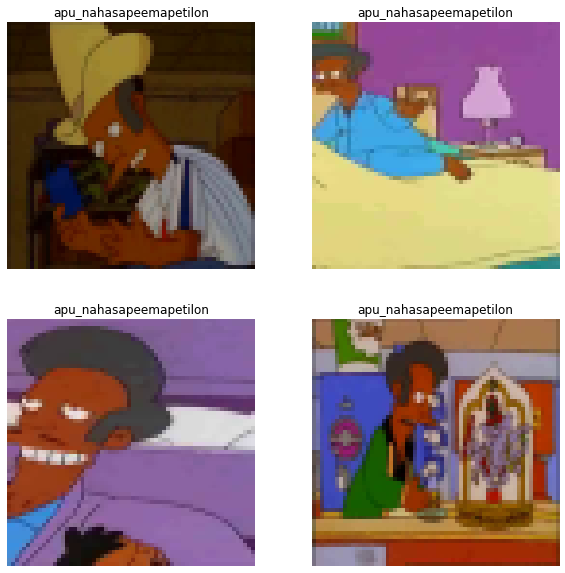

In [ ]:
import matplotlib.pyplot as plt

def draw_Simpson(train_images, train_labels,image_offset =1000):
  data_size = train_images.shape[0]
  if image_offset>= data_size-4:
    image_offset =data_size-4
  fig = plt.figure()
  fig.set_size_inches(10, 10, forward=True)
  rows=2
  cols=2
  
  for i in range(4):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.imshow(train_images[image_offset+i])
    ax.set_title(train_labels[image_offset+i])
    ax.axis("off")

draw_Simpson(train_images, train_labels,image_offset =400)

## 3.데이터셋 전처리

#### 함수로 전처리 과정 모듈화 진행

이미지의 픽셀밝기를 0에서 1사이로 정규화(Normalize)  
머신러닝을 위한 라이브러리인 사이킷런을 사용하여, 데이터셋의 라벨(캐릭터 이름)에 One-hot encoding  

자세한 설명은 [이 글](https://wikidocs.net/22647)을 참조해주세요.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def preprocessing(train_images,train_labels):
    # Image 0~1 정규화
    train_size = train_images.shape[0]
    #print("train data size is ", train_size)

    train_images =train_images.reshape(train_size, 64, 64,3)
    #print(train_images.shape)
    train_images = train_images / 255.0

    # One hot encoding 과정
    enc= OneHotEncoder()
    train_labels_new = train_labels.reshape(-1,1)
    enc.fit(train_labels_new)

    #changed the names through one-hot encoding.
    train_labels_onehot = np.array(enc.transform(train_labels_new).toarray())

    #print("one-hot encoding train shape is ",train_labels_onehot.shape)
    #print(train_labels_onehot)

    return train_images, train_labels_onehot


In [ ]:
def preprocessing_with_mean(train_images,train_labels):
    # Image 0~1 정규화
    train_size = train_images.shape[0]
    #print("train data size is ", train_size)

    train_images =train_images.reshape(train_size, 64, 64,3)
    #print(train_images.shape)
    train_images = train_images / 255.0  

    mean = np.mean(train_images,axis=0)

    train_images -= mean

    # One hot encoding 과정
    enc= OneHotEncoder()
    train_labels_new = train_labels.reshape(-1,1)
    enc.fit(train_labels_new)

    #changed the names through one-hot encoding.
    train_labels_onehot = np.array(enc.transform(train_labels_new).toarray())

    #print("one-hot encoding train shape is ",train_labels_onehot.shape)
    #print(train_labels_onehot)

    return train_images, train_labels_onehot

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def oneHotEncoding(train_labels):
    # One hot encoding 과정
    enc= OneHotEncoder()
    train_labels_new = train_labels.reshape(-1,1)
    enc.fit(train_labels_new)

    #changed the names through one-hot encoding.
    train_labels_onehot = np.array(enc.transform(train_labels_new).toarray())

    #print("one-hot encoding train shape is ",train_labels_onehot.shape)
    #print(train_labels_onehot)

    return train_labels_onehot

#### Training set image augmentation 진행  

https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/  
https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/  



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

def train_image_augmentation(train_image):
    # Image 0~1 정규화
    train_size = train_image.shape[0]
    #print("train data size is ", train_size)

    train_image =train_image.reshape(train_size, 64, 64,3)

    datagen = ImageDataGenerator(
        #featurewise_center=True,
        #featurewise_std_normalization=True,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        #shear_range=0.2,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')
    
    return train_image, datagen

In [ ]:
def test_image_preprocessing(test_image):
    # Image 0~1 정규화
    test_size = test_image.shape[0]
    #print("train data size is ", train_size)

    test_image =test_image.reshape(test_size, 64, 64,3)

    datagen = ImageDataGenerator(
        rescale=1./255)
    
    return test_image, datagen

In [ ]:
from matplotlib import pyplot


def view_image(train_image, train_label,datagen):
  for X_batch, y_batch in datagen.flow(train_image, train_label, batch_size=9):
        # create a grid of 3x3 images
        for i in range(0, 9):
          pyplot.subplot(330 + 1 + i)
          pyplot.imshow(X_batch[i].reshape(64, 64, 3))
        # show the plot
        pyplot.show()
        break
  


## 4.CNN기반의 심슨 캐릭터 분류모델 생성 및 학습

CNN사용간에 Colab의 GPU를 활용하여 봅시다. 현재 프로젝트 상단 헤더의 메뉴바에서 **수정 - 노트 설정**으로 들어가서  **하드웨어 가속기**를 **None**에서 **GPU**로 바꿔주세요. 

이제 모델의 생성이나 학습의 코드전에 
`with tf.device('/gpu:0'):` 라는 코드한줄을 추가하여, colab의 GPU를 활용하게 해봅시다.

주의할 점은 너무 오랜시간동안 GPU를 사용해버리면, 구글 colab에서 GPU사용을 막아버리니 주의하세요.

이제 오늘의 주 내용인 CNN layer를 활용한 모델을 만들어봅시다.

- CNN layer를 통해서 이미지의 feature map을 얻습니다. 
- Max pooling을 통하여 이미지의 사이즈를 줄입니다.
- Flatten layer를 통하여 이미지의 feature map을 벡터형태로 바꿉니다.
- Dense layer와 마지막 softmax activation fuction을 통해서 이미지를 분류합니다.

##### DenseNet 구현  
[Dense Net Image Classification](https://www.kaggle.com/sohaibanwaar1203/dense-net-image-classification)  
[DenseNet-Keras](https://github.com/bhaskar-gaur/DenseNet-Keras/blob/master/DNST_CIFAR10_SGD_Data_Aug.ipynb)  
[(DenseNet) Densely Connected Convolutional Networks 번역 및 추가 설명과 Keras 구현](https://sike6054.github.io/blog/paper/sixth-post/)  
[DenseNets_With_TensorFlow.ipynb](https://colab.research.google.com/drive/1v2p228o-_PRtecU0vYUXuGlG_VierqcP#scrollTo=wbkXMkrTgXiF&forceEdit=true&sandboxMode=true)  


In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam

def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x

In [ ]:
def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters

In [ ]:
def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters

In [ ]:
def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(64, 64, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

In [ ]:
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 20
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 24)   648         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 64, 24)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 24)   0           activation[0][0]                 
______________________________________________________________________________________________

Inception V4

In [ ]:
from keras.models import Model
from keras import layers
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.engine.topology import get_source_inputs
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
#from keras.applications.imagenet_utils import _obtain_input_shape
from keras.preprocessing import image



def conv2d_bn(x,
              filters,
              num_row,
              num_col,
              padding='same',
              strides=(1, 1),
              name=None):
    """Utility function to apply conv + BN.
    Arguments:
        x: input tensor.
        filters: filters in `Conv2D`.
        num_row: height of the convolution kernel.
        num_col: width of the convolution kernel.
        padding: padding mode in `Conv2D`.
        strides: strides in `Conv2D`.
        name: name of the ops; will become `name + '_conv'`
            for the convolution and `name + '_bn'` for the
            batch norm layer.
    Returns:
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
    if K.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
    x = Conv2D(
        filters, (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name)(x)
    x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = Activation('relu', name=name)(x)
    return x

In [ ]:
def Stem(input_tensor, version=None, name=None):
    if version == 'Inception-v4' or version == 'Inception-ResNet-v2':
        x = conv2d_bn(input_tensor, 32, (3, 3), padding='valid', strides=2) # 299x299x3 -> 149x149x32
        x = conv2d_bn(x, 32, (3, 3), padding='valid') # 149x149x32 -> 147x147x32
        x = conv2d_bn(x, 64, (3, 3)) # 147x147x32 -> 147x147x64
        
        branch_1 = MaxPooling2D((3, 3), padding='valid', strides=2)(x)
        branch_2 = conv2d_bn(x, 96, (3, 3), padding='valid', strides=2)
        x = Concatenate()([branch_1, branch_2]) # 73x73x160
        
        branch_1 = conv2d_bn(x, 64, (1, 1))
        branch_1 = conv2d_bn(branch_1, 96, (3, 3), padding='valid')
        branch_2 = conv2d_bn(x, 64, (1, 1))
        branch_2 = conv2d_bn(branch_2, 64, (7, 1))
        branch_2 = conv2d_bn(branch_2, 64, (1, 7))
        branch_2 = conv2d_bn(branch_2, 96, (3, 3), padding='valid')
        x = Concatenate()([branch_1, branch_2]) # 71x71x192
        
        branch_1 = conv2d_bn(x, 192, (3, 3), padding='valid', strides=2) # Fig.4 is wrong
        branch_2 = MaxPooling2D((3, 3), padding='valid', strides=2)(x)
        x = Concatenate(name=name)([branch_1, branch_2]) if name else Concatenate()([branch_1, branch_2]) # 35x35x384
        
    elif version == 'Inception-ResNet-v1':
        x = conv2d_bn(input_tensor, 32, (3, 3), padding='valid', strides=2) # 299x299x3 -> 149x149x32
        x = conv2d_bn(x, 32, (3, 3), padding='valid') # 149x149x32 -> 147x147x32
        x = conv2d_bn(x, 64, (3, 3)) # 147x147x32 -> 147x147x64
        
        x = MaxPooling2D((3, 3), strides=2, padding='valid')(x) # 147x147x64 -> 73x73x64
        
        x = conv2d_bn(x, 80, (1, 1)) # 73x73x64 -> 73x73x80
        x = conv2d_bn(x, 192, (3, 3), padding='valid') # 73x73x80 -> 71x71x192U
        x = conv2d_bn(x, 256, (3, 3), padding='valid', strides=2, name=name) # 71x71x192 -> 35x35x256
        
    else:
        return None # Kill ^^
    
    return x

In [ ]:
def Inception_A(input_tensor, name=None):
    branch_1 = AveragePooling2D((3, 3), strides=1, padding='same')(input_tensor)
    branch_1 = conv2d_bn(branch_1, 96, (1, 1))
    
    branch_2 = conv2d_bn(input_tensor, 96, (1, 1))

    branch_3 = conv2d_bn(input_tensor, 64, (1, 1))
    branch_3 = conv2d_bn(branch_3, 96, (3, 3))
    
    branch_4 = conv2d_bn(input_tensor, 64, (1, 1))
    branch_4 = conv2d_bn(branch_4, 96, (3, 3))
    branch_4 = conv2d_bn(branch_4, 96, (3, 3))
    
    filter_concat = Concatenate(name=name)([branch_1, branch_2, branch_3, branch_4]) if name else Concatenate()([branch_1, branch_2, branch_3, branch_4])
    
    return filter_concat

def Inception_B(input_tensor, name=None):
    branch_1 = AveragePooling2D((3, 3), strides=1, padding='same')(input_tensor)
    branch_1 = conv2d_bn(branch_1, 128, (1, 1))
    
    branch_2 = conv2d_bn(input_tensor, 384, (1, 1))
    
    branch_3 = conv2d_bn(input_tensor, 192, (1, 1))
    branch_3 = conv2d_bn(branch_3, 224, (1, 7))
    branch_3 = conv2d_bn(branch_3, 256, (7, 1)) # Fig.6 is wrong
    
    branch_4 = conv2d_bn(input_tensor, 192, (1, 1))
    branch_4 = conv2d_bn(branch_4, 192, (1, 7))
    branch_4 = conv2d_bn(branch_4, 224, (7, 1))
    branch_4 = conv2d_bn(branch_4, 224, (1, 7))
    branch_4 = conv2d_bn(branch_4, 256, (7, 1))
    
    filter_concat = Concatenate(name=name)([branch_1, branch_2, branch_3, branch_4]) if name else Concatenate()([branch_1, branch_2, branch_3, branch_4])
    
    return filter_concat

def Inception_C(input_tensor, name=None):
    branch_1 = AveragePooling2D((3, 3), strides=1, padding='same')(input_tensor)
    branch_1 = conv2d_bn(branch_1, 256, (1, 1))
    
    branch_2 = conv2d_bn(input_tensor, 256, (1, 1))

    branch_3 = conv2d_bn(input_tensor, 384, (1, 1))
    branch_3a = conv2d_bn(branch_3, 256, (1, 3))
    branch_3b = conv2d_bn(branch_3, 256, (3, 1))
    branch_3 = Concatenate()([branch_3a, branch_3b])
    
    branch_4 = conv2d_bn(input_tensor, 384, (1, 1))
    branch_4 = conv2d_bn(branch_4, 448, (1, 3))
    branch_4 = conv2d_bn(branch_4, 512, (3, 1))
    branch_4a = conv2d_bn(branch_4, 256, (1, 3))
    branch_4b = conv2d_bn(branch_4, 256, (3, 1))
    branch_4 = Concatenate()([branch_4a, branch_4b])
    
    filter_concat = Concatenate(name=name)([branch_1, branch_2, branch_3, branch_4]) if name else Concatenate()([branch_1, branch_2, branch_3, branch_4])
    
    return filter_concat

In [ ]:
reduction_table = {'Inception-v4' : [192, 224, 256, 384],
                   'Inception-ResNet-v1' : [192, 192, 256, 384],
                   'Inception-ResNet-v2' : [256, 256, 384, 384]}

def Reduction_A(input_tensor, version=None, name=None):
    k, l, m, n = reduction_table[version]

    branch_1 = MaxPooling2D((3, 3), padding='valid', strides=2)(input_tensor)

    branch_2 = conv2d_bn(input_tensor, n, (3, 3), padding='valid', strides=2)

    branch_3 = conv2d_bn(input_tensor, k, (1, 1))
    branch_3 = conv2d_bn(branch_3, l, (3, 3))
    branch_3 = conv2d_bn(branch_3, m, (3, 3), padding='valid', strides=2)

    filter_concat = Concatenate(name=name)([branch_1, branch_2, branch_3]) if name else Concatenate()([branch_1, branch_2, branch_3])

    return filter_concat

def Reduction_B(input_tensor, version=None, name=None):
    if version == 'Inception-v4':
        branch_1 = MaxPooling2D((3, 3), padding='valid', strides=2)(input_tensor)
    
        branch_2 = conv2d_bn(input_tensor, 192, (1, 1))
        branch_2 = conv2d_bn(branch_2, 192, (3, 3), padding='valid', strides=2)
    
        branch_3 = conv2d_bn(input_tensor, 256, (1, 1))
        branch_3 = conv2d_bn(branch_3, 256, (1, 7))
        branch_3 = conv2d_bn(branch_3, 320, (7, 1))
        branch_3 = conv2d_bn(branch_3, 320, (3, 3), padding='valid', strides=2)
    
        filter_concat = Concatenate(name=name)([branch_1, branch_2, branch_3]) if name else Concatenate()([branch_1, branch_2, branch_3])

    elif version == 'Inception-ResNet-v1':
        branch_1 = MaxPooling2D((3, 3), padding='valid', strides=2)(input_tensor)
    
        branch_2 = conv2d_bn(input_tensor, 256, (1, 1))
        branch_2 = conv2d_bn(branch_2, 384, (3, 3), padding='valid', strides=2)
    
        branch_3 = conv2d_bn(input_tensor, 256, (1, 1))
        branch_3 = conv2d_bn(branch_3, 256, (3, 3), padding='valid', strides=2)
        
        branch_4 = conv2d_bn(input_tensor, 256, (1, 1))
        branch_4 = conv2d_bn(branch_4, 256, (3, 3))
        branch_4 = conv2d_bn(branch_4, 256, (3, 3), padding='valid', strides=2)
    
        filter_concat = Concatenate(name=name)([branch_1, branch_2, branch_3, branch_4]) if name else Concatenate()([branch_1, branch_2, branch_3, branch_4])

    elif version == 'Inception-ResNet-v2':
        branch_1 = MaxPooling2D((3, 3), padding='valid', strides=2)(input_tensor)
    
        branch_2 = conv2d_bn(input_tensor, 256, (1, 1))
        branch_2 = conv2d_bn(branch_2, 384, (3, 3), padding='valid', strides=2)
    
        branch_3 = conv2d_bn(input_tensor, 256, (1, 1))
        branch_3 = conv2d_bn(branch_3, 288, (3, 3), padding='valid', strides=2)
        
        branch_4 = conv2d_bn(input_tensor, 256, (1, 1))
        branch_4 = conv2d_bn(branch_4, 288, (3, 3))
        branch_4 = conv2d_bn(branch_4, 320, (3, 3), padding='valid', strides=2)
    
        filter_concat = Concatenate(name=name)([branch_1, branch_2, branch_3, branch_4]) if name else Concatenate()([branch_1, branch_2, branch_3, branch_4])
    
    else:
        return None # Kill ^^
    
    return filter_concat

In [ ]:
def Inception_v4(model_input, classes=1000):
    version = 'Inception-v4'
    
    x = Stem(model_input, version=version, name='Stem') # (299, 299, 3) -> (35, 35, 384)
    
    for i in range(4):
        x = Inception_A(x, name='Inception-A-'+str(i+1)) # (35, 35, 384)
    
    x = Reduction_A(x, version=version, name='Reduction-A') # (35, 35, 384) -> (17, 17, 1024)
    
    for i in range(7):
        x = Inception_B(x, name='Inception-B-'+str(i+1)) # (17, 17, 1024)

    x = Reduction_B(x, version=version, name='Reduction-B') # (17, 17, 1024) -> (8, 8, 1536)
    
    for i in range(3):
        x = Inception_C(x, name='Inception-C-'+str(i+1)) # (8, 8, 1536)
    
    x = GlobalAveragePooling2D()(x) # (1536)
    x = Dropout(0.8)(x)
    
    model_output = Dense(classes, activation='softmax', name='output')(x)

    model = Model(model_input, model_output, name='Inception-v4')
    
    return model

#### ResNet 50 구현  
[RESNET from scratch - KERAS](https://www.kaggle.com/akumaldo/resnet-from-scratch-keras)  

identity_block 구현

In [ ]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform

#identity_block

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

convolutional_block 구현

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a',padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(F2, (f, f), strides = (1,1), name = conv_name_base + '2b', padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c', padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

ResNet 50 구현

In [ ]:
def ResNet50(input_shape = (64, 64, 3), classes = 20):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [32, 32, 128], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [32, 32, 128], stage=2, block='b')
    X = identity_block(X, 3, [32, 32, 128], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [64, 64, 256], stage=3, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=3, block='c')
    X = identity_block(X, 3, [64, 64, 256], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='d')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='e')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [256,256, 1024], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [256,256, 1024], stage=5, block='b')
    X = identity_block(X, 3, [256,256, 1024], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2,2), name='avg_pool')(X)
    

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (64, 64, 3), classes = 20)
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 32)   4736        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 32)   128         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
from keras import layers
from keras import models
import tensorflow as tf

def create_new_model():
  with tf.device('/gpu:0'):
    characters = 20
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu')) 
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(characters, activation='softmax'))

    #model.summary()
    
    return model

model2 = create_new_model()
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 512)       2

#### K fold를 이용하여 Training and Test  
- Early stopping  
- K Fold  
- Learning rate  
- DenseNet parameter  
- Best model을 고르기 위한 변수  
- Optimizer  
- Learning rate scheduler 선언  
  

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Nadam, Adam,Adagrad
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

# K fold : Keras CNN Stratified K fold - optimal LR 출처 : https://www.kaggle.com/mohanamurali/keras-cnn-stratified-k-fold-optimal-lr
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=30)

# Learning rate
learning_rate = 0.05

# Batch size
batch_size = 16 

# DenseNet parameter
dense_block_size = 3
layers_in_block = 4
growth_rate = 12
classes = 20

# Best model을 고르기 위한 변수
#best_model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
#best_model = ResNet50(input_shape = (64, 64, 3), classes = 20)
best_model = Inception_v4(model_input=(64,64,3),classes=2)

# Best Validation Set 저장
X_valid_best = np.full((745, 64, 64, 3),10)
y_valid_onehot_best = np.full((745, 20),10)
y_valid_best = np.full((745,),10)

# Optimizer
nadam = Nadam(lr= learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
optimizer = SGD(lr=learning_rate, decay=1e-3, momentum=0.9, nesterov=True)
adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
adagrad = Adagrad(lr=learning_rate, epsilon=1e-08, decay=0.0)

# early stopping
# https://tykimos.github.io/2017/07/09/Early_Stopping/
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=30, verbose=1, mode='min')

# Learning rate scheduler 선언
lr_decay_cb = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: learning_rate + 0.02 * (0.5 ** (1 + epoch)),
        verbose=False)

# Callback 함수 선언
callback = [early_stopping,lr_decay_cb]


TypeError: ignored

k fold를 돌면서 Training and Test  

https://www.pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/  


In [ ]:
from tensorflow.python.keras.utils import losses_utils

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False, label_smoothing=0.1, reduction=losses_utils.ReductionV2.AUTO,
    name='categorical_crossentropy'
)

In [ ]:
def label_smoothing(y_true,y_pred):
     return tf.keras.losses.categorical_crossentropy(y_true,y_pred,label_smoothing=0.1)

In [ ]:
# Best Validation Set 저장
X_valid_best = np.full((745, 64, 64, 3),10)
y_valid_onehot_best = np.full((745, 20),10)
y_valid_best = np.full((745,),10)
cnt = 1

for train_index, test_index in kf.split(train_images, train_labels):
  # Training set과 Validation set으로 나눔
  X_train, X_valid = train_images[train_index], train_images[test_index]
  y_train, y_valid = train_labels[train_index], train_labels[test_index]

  X_valid, y_valid_onehot = preprocessing(X_valid,y_valid)

  if(cnt == 2):
    X_valid_best = X_valid.copy()
    y_valid_onehot_best = y_valid_onehot.copy()
    y_valid_best = y_valid.copy()


In [ ]:
cnt = 1

for train_index, test_index in kf.split(train_images, train_labels):
    
    # Training set과 Validation set으로 나눔
    X_train, X_valid = train_images[train_index], train_images[test_index]
    y_train, y_valid = train_labels[train_index], train_labels[test_index]

    # preprocessing 함수를 통해 이미지 Normalization, One hot encoding 수행
    y_train_onehot = oneHotEncoding(y_train)
    #y_valid_onehot = oneHotEncoding(y_valid)

    #X_train, y_train_onehot = preprocessing(X_train,y_train)
    X_valid, y_valid_onehot = preprocessing(X_valid,y_valid)

    X_train,datagen_train = train_image_augmentation(X_train)
    #trainIter = datagen_train.flow(X_train, y_train_onehot, batch_size=batch_size)
    #X_valid,datagen_valid = test_image_preprocessing(X_valid)
    #validIter = datagen_valid.flow(X_valid, y_valid_onehot, batch_size=batch_size)
    #datagen_train.fit(X_train)
    #X_train = prepare(X_train,True,True)



    # 계속 새로운 모델을 생성
    model = ResNet50(input_shape = (64, 64, 3), classes = 20)
    #model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
    
    # GPU 사용을 위해서
    with tf.device('/gpu:0'):
        model.compile(optimizer= optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'],
                      )
        best_model.compile(optimizer= optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'],
                      )
        
        print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
        #history=model.fit(X_train, y_train_onehot, batch_size=batch_size, epochs=100, verbose=1,validation_data=(X_valid,y_valid_onehot),callbacks=[early_stopping,lr_decay_cb])
        #history=model.fit(datagen.flow(X_train, y_train_onehot), batch_size=batch_size, epochs=100, verbose=1,validation_data=datagen.flow(X_valid,y_valid_onehot),callbacks=[early_stopping,lr_decay_cb])
        history=model.fit_generator(datagen_train.flow(X_train,y_train_onehot,batch_size = batch_size,shuffle=True), epochs=200, verbose=1,validation_data=(X_valid,y_valid_onehot),callbacks=callback)
        #history=model.fit_generator(datagen_train, epochs=100, verbose=1,validation_data=datagen_valid, callbacks=[early_stopping,lr_decay_cb])
        loss_and_metrics = model.evaluate(X_valid, y_valid_onehot, batch_size=32)
        loss_and_metrics_init = best_model.evaluate(X_valid_best, y_valid_onehot_best, batch_size=32)
        print('')  
        print('loss : ' + str(loss_and_metrics[0]))
        print('accuray : ' + str(loss_and_metrics[1]))
        print('')
        
        cnt+=1

        # 만약 현재 model이 best model보다 좋다면 model update
        if(loss_and_metrics[1] > loss_and_metrics_init[1]):
            print('change the best model!')
            best_model.set_weights(model.get_weights())
            X_valid_best = X_valid.copy()
            y_valid_onehot_best = y_valid_onehot.copy()
            y_valid_best = y_valid.copy()
            print(y_valid_best.shape)


Fold:1, Train set: 4465, Test set:745
Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


280/280 [==============================] - 17s 40ms/step - loss: 4.1537 - accuracy: 0.0585 - val_loss: 5.5324 - val_accuracy: 0.0779
Epoch 2/200
280/280 [==============================] - 10s 37ms/step - loss: 2.9328 - accuracy: 0.0835 - val_loss: 2.8738 - val_accuracy: 0.1114
Epoch 3/200
280/280 [==============================] - 10s 37ms/step - loss: 2.8647 - accuracy: 0.1019 - val_loss: 3.0473 - val_accuracy: 0.0631
Epoch 4/200
280/280 [==============================] - 10s 37ms/step - loss: 2.7780 - accuracy: 0.1236 - val_loss: 2.9359 - val_accuracy: 0.1007
Epoch 5/200
280/280 [==============================] - 10s 37ms/step - loss: 2.6961 - accuracy: 0.1616 - val_loss: 2.6429 - val_accuracy: 0.1946
Epoch 6/200
280/280 [==============================] - 10s 37ms/step - loss: 2.6395 - accuracy: 0.1733 - val_loss: 2.5273 - val_accuracy: 0.2295
Epoch 7/200
280/280 [==============================] - 10s 37ms/step - loss: 2.5259 - accuracy: 0.2200 - val_loss: 2.3531 - val_accuracy: 0.28

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


280/280 [==============================] - 16s 40ms/step - loss: 3.5281 - accuracy: 0.0784 - val_loss: 2.6901 - val_accuracy: 0.2121
Epoch 2/200
280/280 [==============================] - 10s 37ms/step - loss: 2.7105 - accuracy: 0.1921 - val_loss: 2.3965 - val_accuracy: 0.2604
Epoch 3/200
280/280 [==============================] - 10s 37ms/step - loss: 2.5027 - accuracy: 0.2552 - val_loss: 2.1281 - val_accuracy: 0.3544
Epoch 4/200
280/280 [==============================] - 10s 37ms/step - loss: 2.2740 - accuracy: 0.3172 - val_loss: 1.9135 - val_accuracy: 0.4255
Epoch 5/200
280/280 [==============================] - 10s 36ms/step - loss: 2.0520 - accuracy: 0.3857 - val_loss: 1.7232 - val_accuracy: 0.4805
Epoch 6/200
280/280 [==============================] - 10s 37ms/step - loss: 1.9300 - accuracy: 0.4108 - val_loss: 1.6350 - val_accuracy: 0.5195
Epoch 7/200
280/280 [==============================] - 10s 37ms/step - loss: 1.7627 - accuracy: 0.4700 - val_loss: 1.5584 - val_accuracy: 0.55

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


279/280 [============================>.] - ETA: 0s - loss: 3.5219 - accuracy: 0.0754

In [ ]:
loss_and_metrics = best_model.evaluate(X_valid_best, y_valid_onehot_best, batch_size=32)
print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))
print('')

24/24 [==============================] - 2s 17ms/step - loss: 1.0262 - accuracy: 0.8618

loss : 1.0141607522964478
accuray : 0.8684563636779785



Optimizer 바꾸면서 Training 결과  

동일한 Traininset, 동일한 Validationset 사용  
DenseNet
1. SGD - accuracy : 0.8483    
2. Adagrad - accuracy : 0.7731  
3. Nadam -  : 0.8456  

SGD  
- lr 0.05 - 0.7923  
    - lr 0.05 batch 16 0.8751  
    - lr 0.04 - 0.7919  

SGD  
- lr 0.05 batch 16 + augmentation 0.833  
- lr 0.06 batch 16 augmentation + label smooting 0.8523  

Nadam  
- lr 0.06 batch 16 + augmentation + label smooting  별로 안 좋음  

ResNet
1. SGD - accuracy : 0.583  
2. Adam - accuracy : 0.65  
3. Nadam - 


ResNet - Adam  
- lr 0.05 batch 16 + augmentation + label smooting 별로 안좋음  

ResNet - SGD  
- lr 0.05 batch 16 + augmentation + label smoothing  0.8429  
- lr 0.06 batch 16 + augmentation + label smoothing  ///

batch size를 증가하면 정확도가 낮아지는 현상을 관찰할 수 있다.  

결과를 실제로 이미지와 이름 쌍으로 확인해볼까요? 먼저 모델의 추론 결과들을 모델의 predict함수로 모두 받습니다.
사이킷런을 통해서 one-hot encoding된 결과는 inverse_transform함수를 통해서 되돌릴 수 있습니다.

In [ ]:
print(y_valid_onehot_best.shape)

(745, 20)


In [ ]:
enc= OneHotEncoder()
y_valid_best = y_valid_best.reshape(-1,1)
enc.fit(y_valid_best)

# with tf.device('/gpu:0'):
#     predictions = best_model.predict(X_valid_best)
#     print(predictions.shape)
#     decoded_predictions_train = enc.inverse_transform(predictions)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

아래의 코드는 이미지와 예측된 라벨이 잘맞았는지 확인하는 코드입니다. 인덱스(index)를 바꿔가며 테스트해보세요.  

(64, 64, 3)


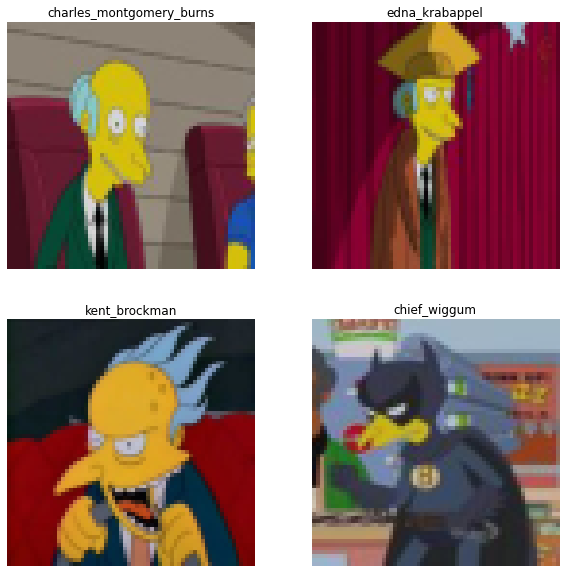

In [ ]:
def view_test(decoded_predictions,images,index):
  data_size = images.shape[0]
  if index>= data_size-4:
    index =data_size-4
  fig = plt.figure()
  fig.set_size_inches(10, 10, forward=True)
  rows=2
  cols=2
  print(images[index].shape)
  for i in range(4):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.imshow((images[index+i]*255).astype('uint8'))
    ax.set_title(decoded_predictions[index+i][0])
    ax.axis("off")
view_test(decoded_predictions_train,X_valid_best,100)

## 5.완성된 모델의 저장과 재사용

완성된 모델은 모델의 구조와 가중치를 포함하여 한번에 저장할 수 있습니다. 아래의 코드를 실행하여 모델을 저장해보세요.

In [ ]:
import tensorflow as tf

#saved_model이라는 이름으로 해당 모델을 저장한다.
best_model.save("./Simpson/saved_model")

INFO:tensorflow:Assets written to: ./Simpson/saved_model/assets


구글드라이브를 살펴보시면 다음과 같이 **saved_model**이라는 폴더가 생길겁니다. 해당 폴더에는 모델의 구조와 가중치등이 저장되어있습니다.

내 드라이브

L Simpson
> L MiniProject#1.ipynb

> L train.npy

> L train_label.npy

> L **saved_model**

저장된 모델은 keras의 **load_model**함수를 통하여 모델의 구조와 가중치 모두를 가져올 수 있습니다. 이전에 만든 view_test함수를 사용하여 결과를 확인해보겠습니다. 편하죠?

In [ ]:
from tensorflow import keras

reconstructed_model = keras.models.load_model("./Simpson/saved_model")
with tf.device('/gpu:0'):
    predictions = reconstructed_model.predict(X_valid_best)
    decoded_predictions_train = enc.inverse_transform(predictions)
view_test(decoded_predictions_train,X_valid_best,250)

ValueError: ignored

##  6.Mini project : CNN모델 개선하기

완성된 모델은 train set에서는 높은 성능을 보여주지만, 아직은 제가 가진 test set에서는 낮은 성능을 보여줄 겁니다.(여러분한테는 test set을 제공하지 않았습니다.) 

아래의 요소들을 고려해서 
- 모델의 레이어 구조
- 학습 파라미터
- data augmentation
- validation set 생성

test set에 대해서 일반화된 모델을 만들어보세요. 

또한 저희가 가진 test set에 대한 정확도에 따라서 순위를 매길겁니다! 모델의 변경한점과 결과를 레포트에 적어주세요.


In [ ]:
##todo !!!!


### 제출간 안내사항
완성된 모델은 아래의 코드를 돌려서 결과를 확인할 겁니다. 지금 상태에서 돌리더라도 train 데이터에 대해서, 확인이 가능할 겁니다. 저희가 평가할 때는 
함수의 첫 번째 인자를 **"train"**에서 **"test"**로 바꿔서 확인할겁니다.
코드 제출양식은 아래와 같이 구성된 Simpson폴더를 압축해서 주세요. 


Simpson
> L MiniProject#1.ipynb

> L saved_model

###※(주의) CNN_project.ipynb는 위의 학습부분을 수정하였더라도, 마지막 코드는 수정하지 말 것. (수정할시, 감점입니다)

###※(주의2) saved_model은 본인이 최종적으로 학습시킨 모델이어야합니다. 해당 모델은 저희가 평가할것입니다. 폴더 이름은 무조건 saved_model로 할것. (이거 안지키면 감점입니다)

In [47]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow import keras
from keras import models
import tensorflow as tf
from google.colab import drive
import os

def test_accuracy(dataset, model_name):
  #구글드라이브 연결 
  drive.mount('/content/drive/')
  
  #이미 현재 경로가 설정되있다면
  if os.getcwd() != '/content/drive/My Drive':
    os.chdir('./drive/My Drive')
  print(os.getcwd())
  #원핫인코딩 설정
  origin_labels = np.array([1,2,3])
  
  if os.path.isfile("./train_label.npy"):#Simpson폴더에 없는경우
    origin_labels = np.load("./train_label.npy")
  else : #Simpson폴더에 있는경우
    origin_labels = np.load("./Simpson/train_label.npy")
  enc= OneHotEncoder()
  origin_labels = origin_labels.reshape(-1,1)
  enc.fit(origin_labels)

  images = np.load("./Simpson/"+dataset+".npy")
  labels = np.load("./Simpson/"+dataset+"_label.npy")

  #이미지 전처리
  images = images / 255.0

  #원핫 인코딩
  labels_new = labels.reshape(-1,1)
  labels_onehot = np.array(enc.transform(labels_new).toarray())

  #저장된 모델을 불러옴
  reconstructed_model = keras.models.load_model("./Simpson/"+model_name)
  with tf.device('/gpu:0'):
      score = reconstructed_model.evaluate(images, labels_onehot, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

#첫 번째 인자를 수정하세요.
test_accuracy(dataset="test",model_name="saved_model")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive
Test loss: 0.08095473796129227
Test accuracy: 0.9763915538787842
